In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(i) Load the .csv file into the notebook.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/DataTensor/hdb/main/resale-flat-prices.csv")

In [ ]:
df.sample(3)

,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
30575,30575,2018-07,BUKIT BATOK,EXECUTIVE,404,BT BATOK WEST AVE 7,04 TO 06,154.0,Apartment,1993,520000.0
61342,61342,2019-11,KALLANG/WHAMPOA,3 ROOM,39,JLN BAHAGIA,01 TO 03,83.0,Terrace,1972,705000.0
45982,45982,2019-03,QUEENSTOWN,4 ROOM,89,TANGLIN HALT RD,10 TO 12,90.0,Model A,2008,720000.0


(ii) Summarize the information that can be derived from the dataset, including key
features (columns), range of values, and missing / non-useful values. All the
information should be derived by necessary Python codes.

In [ ]:
df.columns

Index(['transaction_id', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price'],
      dtype='object')

In [ ]:
df.describe()

,transaction_id,floor_area_sqm,lease_commence_date,resale_price
count,77895.000000,77895.000000,77895.000000,7.789500e+04
mean,38947.000000,97.612341,1994.039155,4.386677e+05
std,22486.493946,24.295162,12.783561,1.532126e+05
min,0.000000,31.000000,1966.000000,1.400000e+05
25%,19473.500000,82.000000,1984.000000,3.300000e+05
50%,38947.000000,95.000000,1994.000000,4.080000e+05
75%,58420.500000,113.000000,2003.000000,5.130000e+05
max,77894.000000,249.000000,2019.000000,1.232000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       77895 non-null  int64  
 1   month                77895 non-null  object 
 2   town                 77895 non-null  object 
 3   flat_type            77817 non-null  object 
 4   block                77895 non-null  object 
 5   street_name          77895 non-null  object 
 6   storey_range         77739 non-null  object 
 7   floor_area_sqm       77895 non-null  float64
 8   flat_model           77895 non-null  object 
 9   lease_commence_date  77895 non-null  int64  
 10  resale_price         77895 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.5+ MB


In [ ]:
df.isna().sum()# sum of missing values in each column

transaction_id           0
month                    0
town                     0
flat_type               78
block                    0
street_name              0
storey_range           156
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
dtype: int64

In [ ]:
df.dtypes

transaction_id           int64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [ ]:
df.shape

(77895, 11)

(iii) Explain TWO (2) potential insights that can be derived from the dataset.

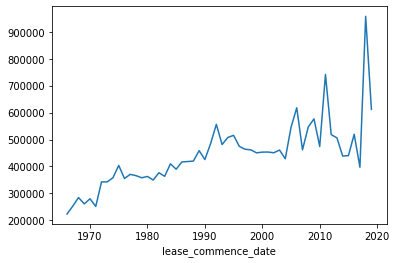

In [ ]:
df.groupby("lease_commence_date").mean()["resale_price"].plot()

In [ ]:
df.groupby("flat_model").mean()["resale_price"]

flat_model
2-room                    2.295000e+05
Adjoined flat             6.745290e+05
Apartment                 6.087442e+05
DBSS                      7.638527e+05
Improved                  4.502800e+05
Improved-Maisonette       6.804920e+05
Maisonette                6.704365e+05
Model A                   4.223038e+05
Model A-Maisonette        7.004836e+05
Model A2                  3.424281e+05
Multi Generation          8.035586e+05
New Generation            3.294380e+05
Premium Apartment         4.615875e+05
Premium Apartment Loft    8.775277e+05
Premium Maisonette        7.465000e+05
Simplified                3.390103e+05
Standard                  3.927329e+05
Terrace                   8.075762e+05
Type S1                   9.252694e+05
Type S2                   1.027543e+06
Name: resale_price, dtype: float64

(i) Refer to Q1(a)(ii), remove all the data rows with missing data values.

In [ ]:
df.dropna(inplace=True)
df.shape

(77661, 11)

(ii) In Singapore, HDB flats have a 99 years’ leasehold. Compute the remaining
lease in years for each transacted flat on its transacted date.

In [ ]:
remaining_lease_in_years = 99-(2021-df["lease_commence_date"])

In [ ]:
remaining_lease_in_years

0        57
1        56
2        58
3        58
4        58
         ..
77889    63
77890    65
77891    65
77892    64
77894    65
Name: lease_commence_date, Length: 77661, dtype: int64

In [ ]:
df["remaining_lease_in_years"] = remaining_lease_in_years

(iii) List out the top ten of remaining lease in years (computed by Q1(b)(ii) having
the greatest number of transacted flats.

In [ ]:
df.groupby("remaining_lease_in_years").count().sort_values(by="street_name",ascending=False).head(10).index

Int64Index([63, 93, 62, 66, 91, 79, 75, 65, 76, 81], dtype='int64', name='remaining_lease_in_years')

In [ ]:
df.to_csv("Cleaned.csv")

In [ ]:
df.head(1)

,Unnamed: 0,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_years,storey_lower_limit,storey_upper_limit
0,0,0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,57,10,12
